<a href="https://colab.research.google.com/github/akashgoyal-20/Learn-Probability-Density-Functions-using-Roll-Number-Parameterized-Non-Linear-Model/blob/main/Probability_Density_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name - Akash Goyal**

**Roll No. - 102317024**

**Assignment-1(Probability Density Function)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('data.csv', encoding="latin1")
data.head()

/tmp/ipython-input-4046299695.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('data.csv', encoding="latin1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [8]:
data=data.dropna(subset=["no2"])
x=data["no2"].values
x

array([17.4,  7. , 28.5, ..., 45. , 50. , 46. ])

In [9]:
r=102317024
ar=0.05*(r%7)
br=0.3*(r%5+1)
z=x+ar*np.sin(br*x)

In [10]:
z #because 1012317024%7=0 therefore ar=0 => z=x

array([17.60583325,  6.78007606, 28.26418647, ..., 44.75024463,
       49.90305459, 45.9713038 ])

In [11]:
mu=np.mean(z)
var=np.var(z)
lam=1/(2*var)
c=np.sqrt(lam/np.pi)

In [12]:
mu,lam,c

(np.float64(25.818063543032295),
 np.float64(0.0014617052940514906),
 np.float64(0.021570239817484047))

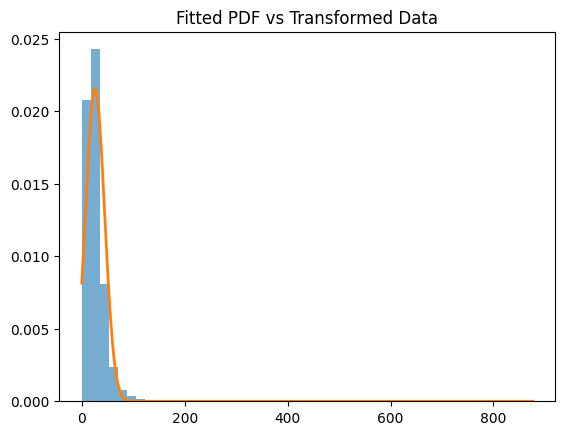

In [13]:
plt.hist(z,bins=50,density=True,alpha=0.6)
z_vals=np.linspace(z.min(),z.max(),500)
pdf=c*np.exp(-lam *(z_vals-mu)**2)
plt.plot(z_vals,pdf,linewidth=2)
plt.title("Fitted PDF vs Transformed Data")
plt.show()